In [2]:
# Firstly, importing all neccesary packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importing House Rent Prediction Dataset
hp = pd.read_csv (r"House_Rent_Dataset.csv")

In [8]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [9]:
# Let's see the first 5 rows of the dataset
hp.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [10]:
# and now, Let's see the last 5 rows of the dataset as using tail
hp.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [11]:
hp.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [12]:
hp.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
# Let's have a look at highest and lowest rent prices.
print(f"Highest Rent: {hp.Rent.max()}")
print(f"Lowest Rent: {hp.Rent.min()}")

Highest Rent: 3500000
Lowest Rent: 1200


In [4]:
# Creating a copy of House Rent Dataset
houserent_hp = hp.copy()

In [7]:
houserent_hp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4741    False
4742    False
4743    False
4744    False
4745    False
Length: 4746, dtype: bool

In [48]:
# Let's remove unnecesaary columns from dataset 
houserent_hp = houserent_hp.drop(['Posted On','Area Locality'],axis=1)
houserent_hp.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [49]:
# Let's see the true values reflecting  missing values
houserent_hp.isnull()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4741,False,False,False,False,False,False,False,False,False,False
4742,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False


In [60]:
# Let's examine the "Furnishing Status" if need action
pd.unique(houserent_hp["Furnishing Status"])

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [61]:
# Let's examine the "City" if need action
pd.unique(houserent_hp["City"])

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [62]:
# Let's examine the "Floor" if need action
pd.unique(houserent_hp["Floor"])

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [65]:
# Let's divide the Floor into the two different column.
houserent_hp[['Level', 'Total']] = houserent_hp['Floor'].str.split(' out of ', expand=True)
houserent_hp

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floor,Level,Total
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2,Ground,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,1,3
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,1,3
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,1,2
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,3,5
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,1,4
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,3,5
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,23,34


In [67]:
# I can see its duplicated so let's drop two of column.
houserent_hp = houserent_hp.drop(['Floor Level','Total Floor'],axis=1)
houserent_hp

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Total
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [69]:
houserent_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Bathroom           4746 non-null   int64 
 9   Point of Contact   4746 non-null   object
 10  Level              4746 non-null   object
 11  Total              4742 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [70]:
#Also I will not need "Floor" column anymore as we created two column as "Level of Floor and Total"
houserent_hp = houserent_hp.drop(['Floor'],axis=1)
houserent_hp


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Total
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [71]:
# Before created two cloumn, I was seeing there is no missing value but now I can see non-null values. 
houserent_hp.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Level                0
Total                4
dtype: int64

In [74]:
# Let's fix it
houserent_hp = houserent_hp.dropna()
houserent_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4742 non-null   int64 
 1   Rent               4742 non-null   int64 
 2   Size               4742 non-null   int64 
 3   Area Type          4742 non-null   object
 4   City               4742 non-null   object
 5   Furnishing Status  4742 non-null   object
 6   Tenant Preferred   4742 non-null   object
 7   Bathroom           4742 non-null   int64 
 8   Point of Contact   4742 non-null   object
 9   Level              4742 non-null   object
 10  Total              4742 non-null   object
dtypes: int64(4), object(7)
memory usage: 444.6+ KB


In [75]:
#Let's check again
houserent_hp.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Level                0
Total                0
dtype: int64

In [88]:
# Let's check data types
houserent_hp.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
Level                object
Total                object
dtype: object

In [5]:
# Let's analysis the dataset
house_analysis = houserent_hp
house_analysis.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [87]:
# Let's look up the BHK is bigger than 2, and rent is smaller than 7000
house_analysis[np.logical_and(house_analysis["BHK"]>2, house_analysis["Rent"]<7000)]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Total
23,3,6500,1600,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,Ground,2
249,3,3200,800,Carpet Area,Kolkata,Furnished,Bachelors/Family,2,Contact Owner,1,3
4076,3,1200,2100,Carpet Area,Hyderabad,Furnished,Bachelors/Family,3,Contact Owner,1,3


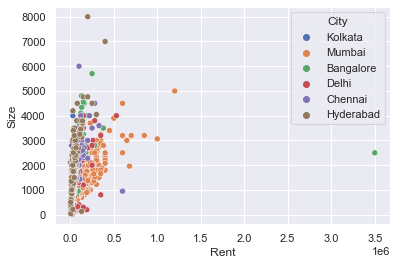

In [47]:
# Which city is more expensive?
house_rent = sns.scatterplot(x='Rent',y='Size', data=house_analysis, hue='City');
house_rent;

In [45]:
city_analysis = house_analysis['City'].value_counts()
city_analysis

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

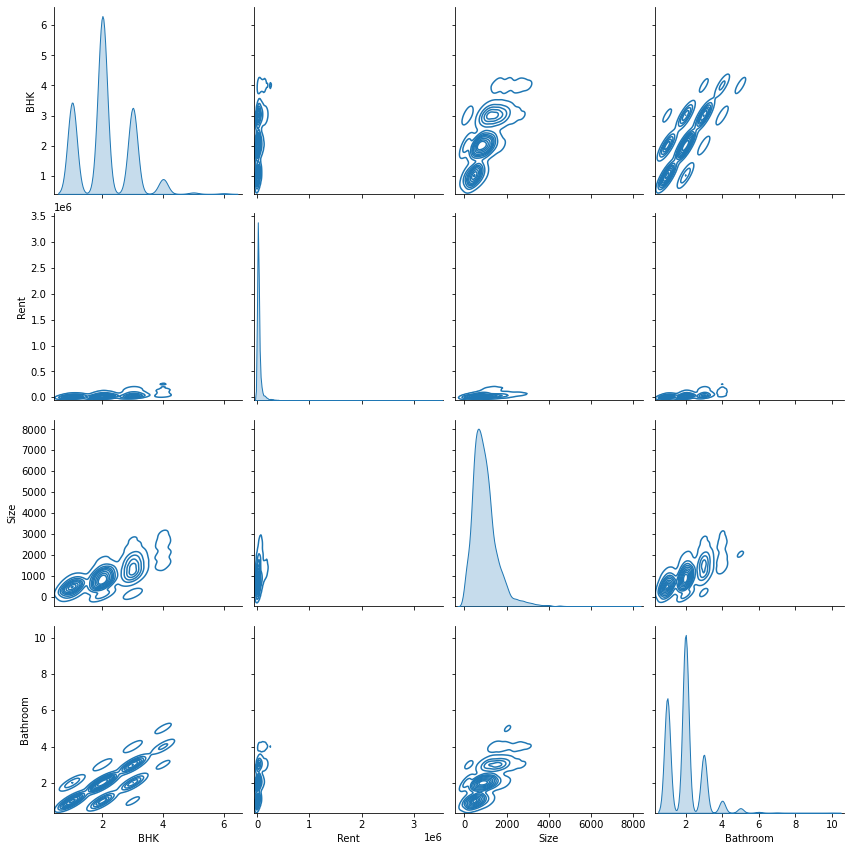

In [21]:
# Pairplot of the dataset

sns.pairplot(house_analysis,height=3, kind="kde")
plt.show()

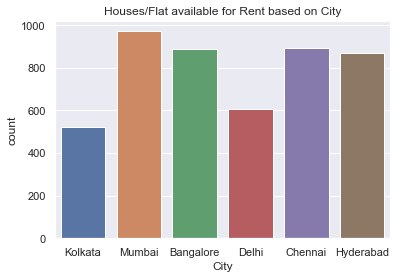

In [40]:
# Let's see available houses for renting based on City
house_city = sns.countplot(x='City',data=house_analysis,)
plt.title('Houses/Flat available for Rent based on City',)
plt.show()


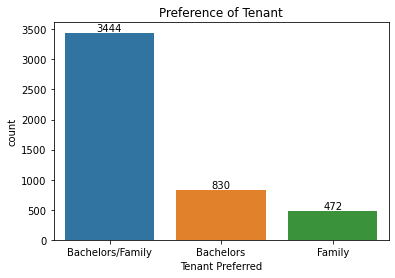

In [14]:
# Let's see Preference of Tenant
house_POC = sns.countplot(x='Tenant Preferred',data=house_analysis,)
for container in house_POC.containers:
    house_POC.bar_label(container)
plt.title('Preference of Tenant',)
plt.show()


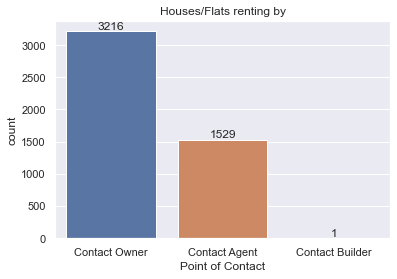

In [42]:
# Let's see available houses for renting based on City
house_POC = sns.countplot(x='Point of Contact',data=house_analysis,)
for container in house_POC.containers:
    house_POC.bar_label(container)
plt.title('Houses/Flats renting by',)
plt.show()


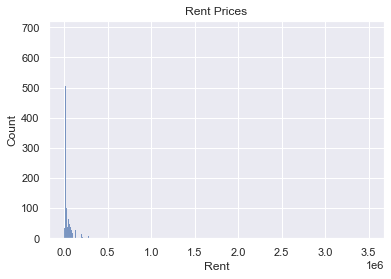

In [56]:
# Let's see Rent Prices
house_POC = sns.histplot(x='Rent',data=house_analysis,)
plt.title('Rent Prices',)
plt.show()


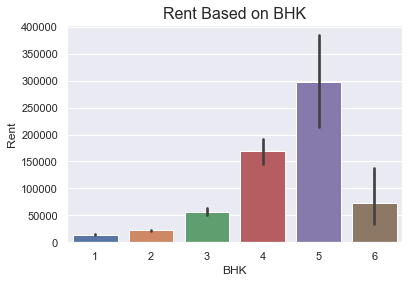

In [84]:
# Let's see Rent Prices based on BHK
sns.barplot(data=house_analysis, x="BHK", y="Rent")
plt.title('Rent Based on BHK',fontsize=16);
